In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

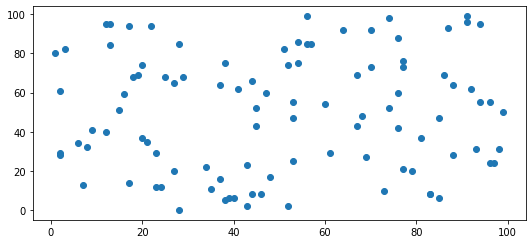

In [56]:
df = pd.DataFrame()
X = []
Y = []
for _ in range(100):
    # 100 random points from 0 to 100
    x = np.random.randint(0,100)
    y = np.random.randint(0,100)
    
    X.append(x)
    Y.append(y)

df['X'] = X
df['Y'] = Y

plt.scatter(X, Y)
plt.show()

In [57]:
df.head()

,X,Y
0,27,65
1,38,75
2,51,82
3,61,29
4,53,25


In [58]:
df.to_csv('dataset.csv')

In [59]:
def euclidean_distance(X,Y):
    x1, y1 = X
    x2, y2 = Y
    x = abs(x1-x2)
    y = abs(y1-y2)
    
    return math.pow((math.pow(x,2) + math.pow(y,2)), 0.5)

In [60]:
df.head()

,X,Y
0,27,65
1,38,75
2,51,82
3,61,29
4,53,25


In [61]:
df = df[['X', 'Y']]
dataset = df.astype(float).values.tolist()

data = df.values 

In [62]:
def k_means(df,k, max_iterations=100):
    
    centroids = {}
    
    for i in range(k):
        centroids[i] = df[i]
    
    for i in range(max_iterations):
        classes = {}
        for i in range(k):
            classes[i] = []
            
        for features in df:
            distances = [euclidean_distance(features, centroids[centroid]) for centroid in centroids]

            classification = distances.index(min(distances))
            classes[classification].append(features)
        
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        return classes

In [63]:
ans = k_means(data, 3, 100)

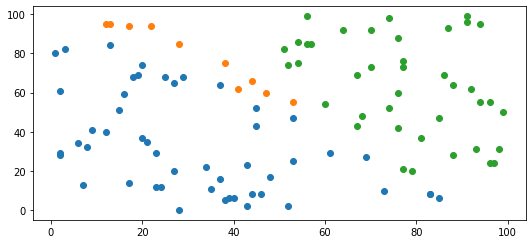

In [64]:
for key in ans:
    # print(key, ans[key])
    X = []
    Y = []
    for k in ans[key]:
        # print(k[0], k[1])
        X.append(k[0])
        Y.append(k[1])
    plt.scatter(X, Y)